# Google Stock Analysis 

Download stock price data from Yahoo Finance 
Calculate daily & cumulative returns 
Analyse volatility with rolling windows 
Visualise price trends and moving averages 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [3]:
data = yf.download("GOOGL", start="2015-01-01", end="2025-01-01")

data.head()

/var/folders/m5/pl7f3qbs4wz97g9ld9_84ysw0000gn/T/ipykernel_21661/1147196302.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("GOOGL", start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2015-01-02,26.296135,26.606494,26.213205,26.447589,26480000
2015-01-05,25.795088,26.218667,25.710175,26.176955,41182000
2015-01-06,25.158480,25.881988,25.104352,25.846732,54456000
2015-01-07,25.084488,25.399316,25.010003,25.372502,46918000
2015-01-08,25.171890,25.201187,24.581461,24.903739,73054000


### Data Cleaning
- Check missing values
- Ensure datetime index is correct
- Keep only relevant columns (e.g., 'Close')

In [4]:
# Check for missing values
data.isnull().sum()

# Keep only 'Close'
df = data[["Close"]].copy()
df.rename(columns={'Close': 'Price'}, inplace=True)


### Return Calculation
- pct_change calculates the percentage change between the current value and the previous one
- cumprod() used to calculate the cumulative product of a series 
- Combining with pct change to calculate the cumulative returns 

in your stock project:
- You use pct_change() to see daily % change.
- Then cumprod() to see long-term investment growth.

Note: cumulative helps compare stock over years instead of day to day / long term performance 

In [5]:
# Daily returns
df['Daily Return'] = df['Price'].pct_change()

# Cumulative returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()


### Moving averages:
1. Smooth out volatility → reveal the underlying trend.
2. Identify trends → is the stock in an uptrend or downtrend?
3. Trading signals → when a short-term MA crosses a long-term MA, traders see it as a buy/sell signal.

Smoothing the trend with average using rolling. 

In [6]:
df['MA30'] = df['Price'].rolling(window=30).mean()
df['MA100'] = df['Price'].rolling(window=100).mean()


## Visualisation
- Price vs Moving Averages
- Daily returns distribution
- Cumulative returns

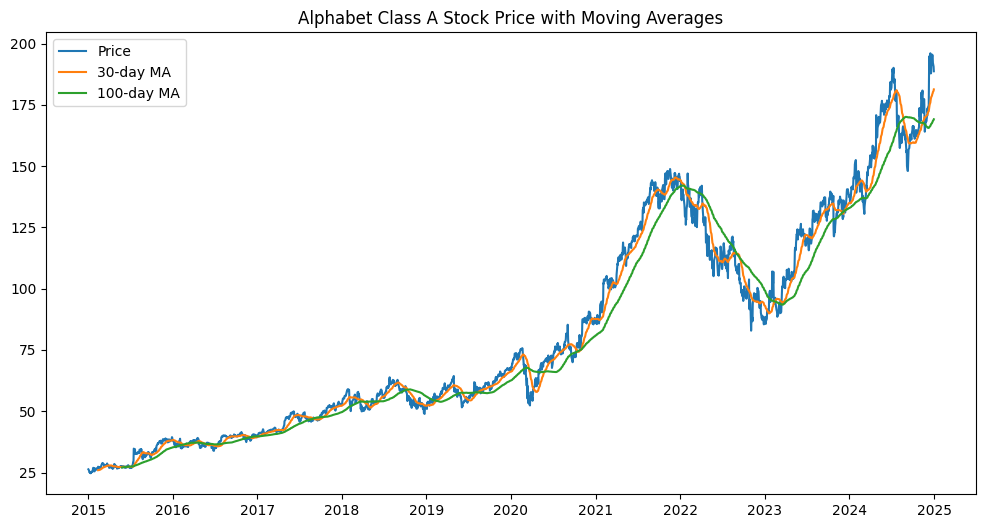

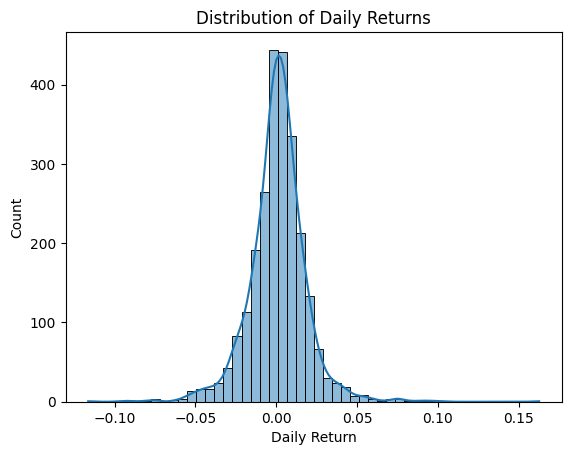

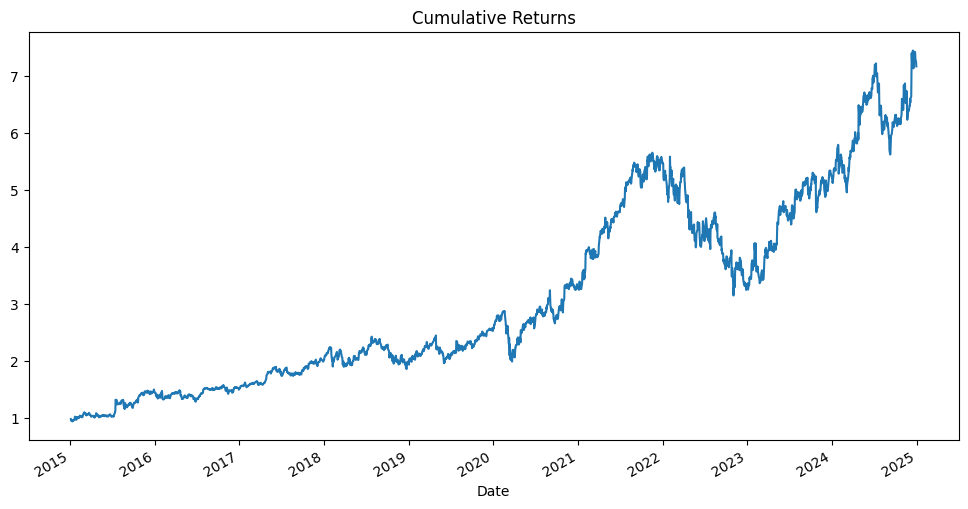

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df['Price'], label='Price')
plt.plot(df['MA30'], label='30-day MA')
plt.plot(df['MA100'], label='100-day MA')
plt.legend()
plt.title("Alphabet Class A Stock Price with Moving Averages")
plt.show()


# Daily returns distribution
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()



# Cumulative returns
df['Cumulative Return'].plot(figsize=(12,6), title="Cumulative Returns")
plt.show()


### Distribution of Daily Returns 
- Center Around 0.00: Most daily returns are close to 0%, meaning the asset (likely a stock or portfolio) usually doesn't change much day-to-day.
- Normal Distribution Shape: The histogram looks like a bell curve, which is typical for financial returns. This suggests:
- Small changes (positive or negative) are common.
- Large changes are rare.
- Symmetry: The distribution is fairly symmetrical, indicating that gains and losses of similar magnitude occur with roughly equal frequency.

## Volatility Analysis 
- 30 days rolling standard deviation 

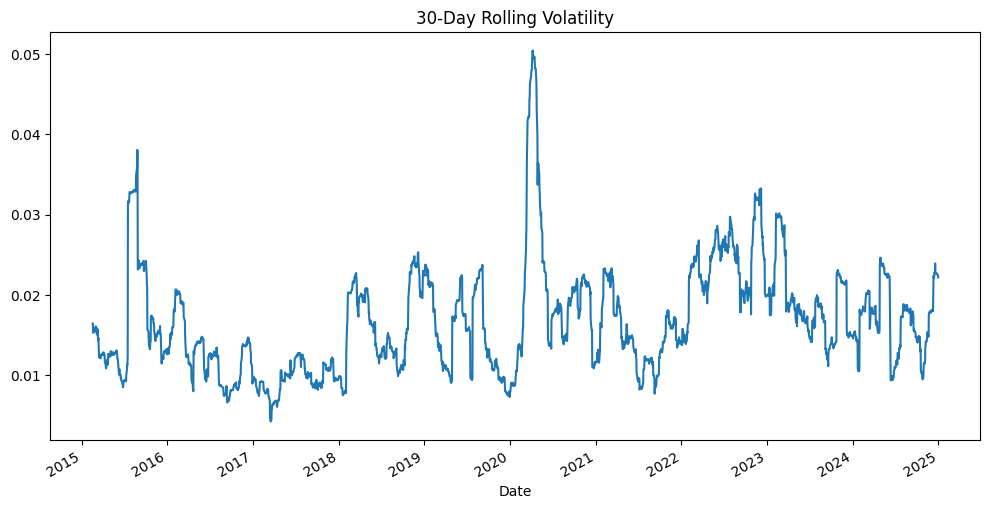

In [8]:
df['Volatility'] = df['Daily Return'].rolling(window=30).std()

df['Volatility'].plot(figsize=(12,6), title="30-Day Rolling Volatility")
plt.show()


## Conclusion 
- What trends do you observe?
- Did volatility spike during certain events (e.g., COVID-19 in 2020)?
- How did moving averages track price trends?

- Alphabet’s share price demonstrated a strong long-term growth trend, reflecting its dominant position in the technology sector and consistent revenue expansion.
- Volatility spiked during key global events, most prominently in March 2020 when the COVID-19 pandemic triggered a market-wide selloff. The stock later rebounded strongly, fuelled by digital advertising growth and accelerated cloud adoption. Additional volatility was observed in 2022, as inflation concerns and rising interest rates pressured technology valuations.
- A more prolonged dip occurred between late 2021 and early 2023, driven by a combination of rising interest rates, high inflation, and fears of a global recession, which weighed heavily on technology valuations. At the same time, Alphabet’s advertising revenues slowed, particularly on YouTube, while competition from TikTok and uncertainty around the rise of generative AI (e.g., Microsoft–OpenAI partnership) added pressure.
- The 30-day moving average captured Alphabet’s short-term momentum, showing rapid responses to earnings announcements and macroeconomic news, but also introduced more noise. By contrast, the 100-day moving average provided a smoother, long-term signal, confirming Alphabet’s sustained upward trajectory over multiple years.
- Notably, golden cross patterns (30-day crossing above 100-day) aligned with periods of recovery, while death crosses coincided with broader market corrections.
- Overall, Alphabet’s case illustrates how moving averages and volatility analysis help distinguish between temporary shocks and the company’s long-term growth trend, making them essential tools for both traders and long-term investors.

## Add Sharpe Ratio 
Sharpe ratio is used to measure how well the return compensated the risk
* Sharpe < 1 = Weak (risk may not be worth it)

In [9]:
returns = df['Price'].pct_change().dropna()


# Risk free rate is 4.03% as of September 11, 2025 and 252 trading days 

rf = 0.0403 / 252  

# Excess returns
excess_ret = returns - rf

# Annualised Sharpe Ratio
sharpe_ratio = (excess_ret.mean() * 252) / (excess_ret.std() * np.sqrt(252))
# sharpe_ratio.index.name = None   # remove "Ticker" label
print(f"Sharpe Ratio (2015–2025): {sharpe_ratio:}")


Sharpe Ratio (2015–2025): Ticker
GOOGL    0.694234
dtype: float64


## Compare GOOGL to S&P 500

In [10]:
# Download benchmark
sp500 = yf.download("^GSPC", start="2015-01-01", end="2025-01-01")

# Keep only 'Close'
sp500 = sp500[["Close"]].copy()
sp500.rename(columns={'Close': 'Price'}, inplace=True)

# Benchmark returns
sp500_returns = sp500.pct_change().dropna()
sp500_excess = sp500_returns - rf

# Sharpe ratio for benchmark
sharpe_sp500 = (sp500_excess.mean() * 252) / (sp500_excess.std() * np.sqrt(252))
print(f"S&P 500 Sharpe Ratio (2015–2025): {sharpe_sp500:}")

# # Cleaning
# # Daily returns
# sp['Daily Return'] = sp['Price'].pct_change()

# # Cumulative returns
# sp['Cumulative Return'] = (1 + sp['Daily Return']).cumprod()


# # Benchmark returns
# sp500_returns = sp.pct_change().dropna() 
# sp500_excess = sp500_returns - rf


/var/folders/m5/pl7f3qbs4wz97g9ld9_84ysw0000gn/T/ipykernel_21661/1545405639.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2015-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

S&P 500 Sharpe Ratio (2015–2025): Price  Ticker
Price  ^GSPC     0.453724
dtype: float64


## Analysing Risk vs Return

                Alphabet (GOOGL)   S&P 500
GOOGL                   0.694234       NaN
(Price, ^GSPC)               NaN  0.453724


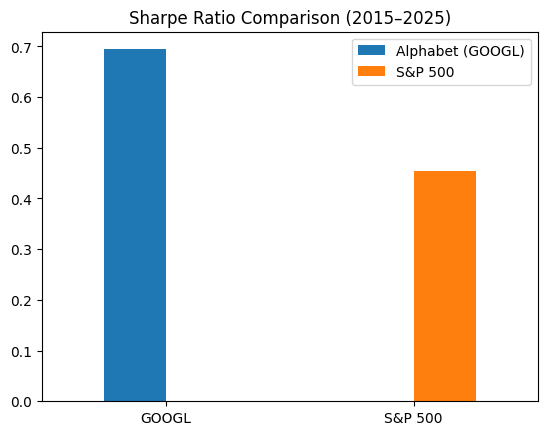

In [11]:
sharpe_data = pd.DataFrame({
    "Alphabet (GOOGL)": sharpe_ratio,
    "S&P 500": sharpe_sp500
})
print(sharpe_data)


ax = sharpe_data.plot(kind='bar', title="Sharpe Ratio Comparison (2015–2025)")
ax.set_xticklabels(['GOOGL', 'S&P 500'], rotation=0)  # rotation=0 keeps them horizontal
plt.show()

